### Aim : To predict the behaviour of sapa.com customers towards responding to a marketing campaign
#### Objective : To create a binary classification machine learning model to perform this task
#### Business problem : Predicting if a customer will respond to a marketing campaign
#### Machine Learning problem : Understanding the given parameters, and checking how these parameter affect the responsiveness of a customer
___
#### Methodology
* Import all neccessary libraries
* Load dataset
* Exploratory Data Analysis
* impute missing values
* Check for anomalies, that is, outliers/noise, and clean the data
* Preprocessing
* Feature selection and engineering
* Dealing with imbalanced dataset
* Build models and make predictions
* Check for accuracy, using evaluation metrics
* Present / Submit the results

### Importing Llibraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_row",None,"display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
train = pd.read_csv('Train.csv', parse_dates = ['Date_Customer'])
test = pd.read_csv('Test.csv', parse_dates = ['Date_Customer'])

### User Defined Functions

In [3]:
def quality_report(df):
    
    """
    Description: Displays quality of data in terms of missing values, number of unique values,
    percentage of missing values and data type.
    
    Arguement: Dataframe
    """
    
    dtype = df.dtypes
    nunique = df.nunique()
    null_values = df.isna().sum()
    percent = (df.isna().sum()/df.count()*100).round(2)
    report_df = pd.concat([nunique, null_values, percent, dtype], axis = 1, keys = ['Nunique', 'Total_NaN', 'Percentage of NaN', 'Dtypes'])
    return report_df

def object_count_plot(df):
    
    """
    Description: Plots countplot for all categotical features in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for var in df.columns.difference(['ID']):
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize = (12, 7))
            plot = sns.countplot(x = var, data = df)
            plt.tight_layout()
            plt.show()
    return plot

def num_dist_plot(df):
    
    """
    Description: Plots distribution plot for the numerical features selected in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize = (12, 7))
            print(col)
            plt.title('Distribution plot for ' + col)
            plot = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

### EDA

In [4]:
quality_report(train)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
ID,1568,0,0.00,object
Year_of_Birth,56,0,0.00,int64
Education_Level,5,0,0.00,object
Marital_Status,8,0,0.00,object
Disposable_Income,1431,16,1.03,float64
No_of_Kids_in_home,3,0,0.00,int64
No_of_Teen_in_home,3,0,0.00,int64
Date_Customer,619,0,0.00,datetime64[ns]
Recency,100,0,0.00,int64
Discounted_Purchases,15,0,0.00,int64


#### Univariate analysis

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64


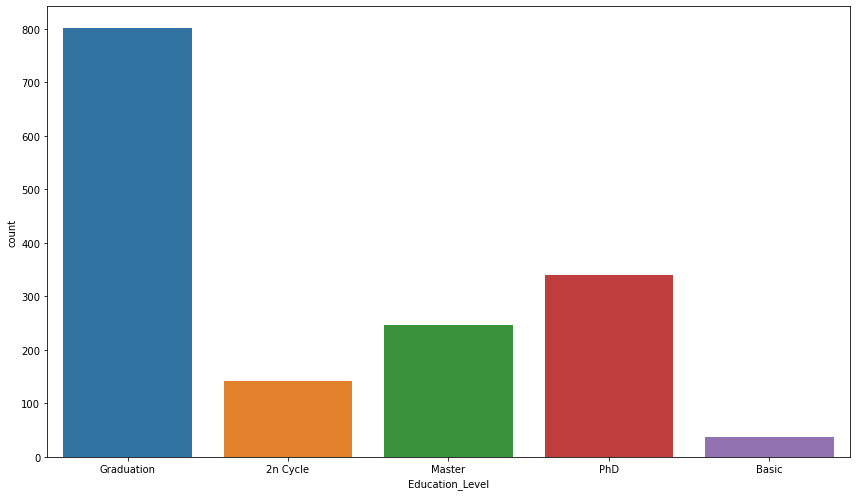

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64


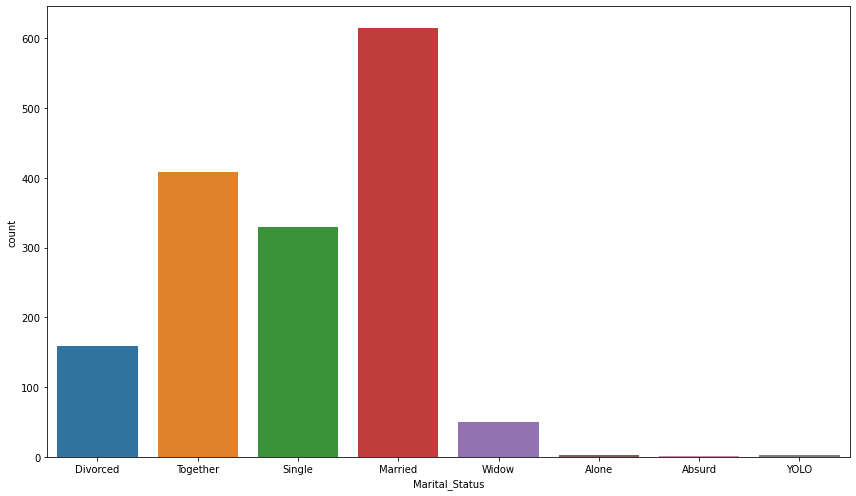

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

In [5]:
object_count_plot(train)

In [6]:
# num_dist_plot(train)

<AxesSubplot:xlabel='Response', ylabel='count'>

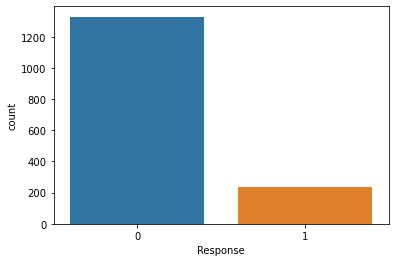

In [7]:
sns.countplot(train.Response)

In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1552 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

(None, None)

In [9]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Locating and treating Outlier

<AxesSubplot:xlabel='Disposable_Income'>

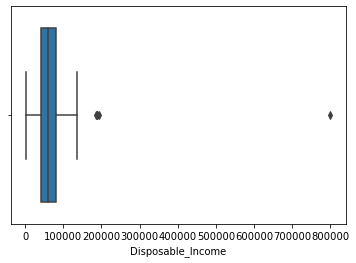

In [11]:
sns.boxplot(train.Disposable_Income)

<AxesSubplot:xlabel='Disposable_Income'>

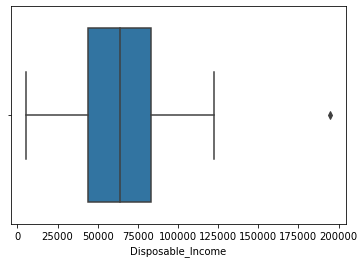

In [12]:
sns.boxplot(test.Disposable_Income)

In [13]:
train[train.Disposable_Income > 200000]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
190,ID_VIUX07W2,1978,Graduation,Together,799999.2,1,0,2013-02-06,30,4,3,1,3,14,17,18,8,1,12,6,0,0,0,0,0,0,0


In [14]:
train = train.drop(190)

### Treating missing values

In [15]:
train.Disposable_Income.fillna(train.Disposable_Income.median(), inplace = True)
test.Disposable_Income.fillna(test.Disposable_Income.median(), inplace = True)

In [16]:
train.shape, test.shape

((1567, 27), (672, 26))

### Data Preprocessing

#### Handling categorical features

In [17]:
education = {
    'Graduation' : 1,
    'PhD' : 2,
    'Master' : 3,
    '2n Cycle' : 4,
    'Basic' : 5
}

train.Education_Level = train.Education_Level.map(education)
test.Education_Level = test.Education_Level.map(education)

marital = {
    'Married' : 1,
    'Together' : 2,
    'Single' : 3,
    'Divorced' : 4,
    'Widow' : 5,
    'Alone' : 6,
    'YOLO' : 7,
    'Absurd' : 8
}

train.Marital_Status = train.Marital_Status.map(marital)
test.Marital_Status = test.Marital_Status.map(marital)

#### Combining Dataset

In [18]:
test['Response'] = 'test'
all_data = pd.concat((train,test)).reset_index(drop=True)

In [19]:
# all_data

###  Feature Engineering

In [20]:
max(all_data['Date_Customer'])

Timestamp('2014-12-06 00:00:00')

In [21]:
all_data['year'] = all_data.Date_Customer.dt.year
all_data['month'] = all_data.Date_Customer.dt.month
all_data['quarter'] = all_data.Date_Customer.dt.quarter

today = pd.to_datetime('2014-12-31')

all_data['duration_days'] = (today - all_data.Date_Customer).dt.days
all_data['duration_months'] = ((today - all_data.Date_Customer)/np.timedelta64(1, 'M')).astype(int)
all_data['is_month_end'] = all_data.Date_Customer.dt.is_month_end.astype(int)
all_data['is_month_start'] = all_data.Date_Customer.dt.is_month_start.astype(int)

In [22]:
all_data['no_of_children'] = all_data['No_of_Kids_in_home'] + all_data['No_of_Teen_in_home']

In [23]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

poly1 = poly.fit_transform(all_data[poly_feature_1])
poly2 = poly.fit_transform(all_data[poly_feature_2])

In [26]:
df_poly1 = pd.DataFrame(poly1, columns = [f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns = [f"poly2_{i}" for i in range(poly2.shape[1])])

In [27]:
display(df_poly1.columns, df_poly2.columns)

Index(['poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9'],
      dtype='object')

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11',
       'poly2_12', 'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17',
       'poly2_18', 'poly2_19', 'poly2_20'],
      dtype='object')

In [28]:
new_data = pd.concat([all_data.drop('Date_Customer', axis = 1), df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [29]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', '

In [30]:
# year_month
new_data['year_month'] = new_data['year'].astype(str) + "_" + new_data['month'].astype(str)

In [31]:
# bin_label
new_data['Recency_bin'] = pd.qcut(new_data.Recency, q = [0, .2, .4, .6, .8, 1], labels = False)

In [32]:
new_data['Recency_mean_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('mean')
new_data['Recency_std_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('std')
new_data['Recency_min_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('min')
new_data['Recency_max_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('max')

In [33]:
new_data['year_month_int'], unique = pd.factorize(new_data['year_month'])

In [34]:
new_data['Total_Purchase'] = new_data[poly_feature_1].sum(axis = 1)
new_data['Total_Amount'] = new_data[poly_feature_2].sum(axis = 1)

In [35]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', '

In [36]:
new_data.shape

(2239, 74)

In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2239 non-null   object 
 1   Year_of_Birth            2239 non-null   int64  
 2   Education_Level          2239 non-null   int64  
 3   Marital_Status           2239 non-null   int64  
 4   Disposable_Income        2239 non-null   float64
 5   No_of_Kids_in_home       2239 non-null   int64  
 6   No_of_Teen_in_home       2239 non-null   int64  
 7   Recency                  2239 non-null   int64  
 8   Discounted_Purchases     2239 non-null   int64  
 9   WebPurchases             2239 non-null   int64  
 10  CatalogPurchases         2239 non-null   int64  
 11  StorePurchases           2239 non-null   int64  
 12  Amount_on_Wines          2239 non-null   int64  
 13  Amount_on_Fruits         2239 non-null   int64  
 14  Amount_on_MeatProducts  

In [38]:
train_df = new_data.loc[(new_data['Response'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['Response'] == 'test')].reset_index(drop = True)

In [39]:
train_df.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,year,month,quarter,duration_days,duration_months,is_month_end,is_month_start,no_of_children,poly1_0,poly1_1,poly1_2,poly1_3,poly1_4,poly1_5,poly1_6,poly1_7,poly1_8,poly1_9,poly2_0,poly2_1,poly2_2,poly2_3,poly2_4,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9,poly2_10,poly2_11,poly2_12,poly2_13,poly2_14,poly2_15,poly2_16,poly2_17,poly2_18,poly2_19,poly2_20,year_month,Recency_bin,Recency_mean_on_yr_mth,Recency_std_on_yr_mth,Recency_min_on_yr_mth,Recency_max_on_yr_mth,year_month_int,Total_Purchase,Total_Amount
0,ID_4A9AR6FQ,1955,1,4,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,2,192,6,0,0,2,2.0,1.0,1.0,4.0,2.0,2.0,8.0,1.0,4.0,4.0,71.0,3.0,16.0,0.0,6.0,20.0,213.0,1136.0,0.0,426.0,1420.0,48.0,0.0,18.0,60.0,0.0,96.0,320.0,0.0,0.0,120.0,2014_6,2,53.590164,30.163652,7,106,0,8,116
1,ID_X28T3VEK,1958,1,2,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,1,722,23,0,0,1,6.0,5.0,1.0,8.0,30.0,6.0,48.0,5.0,40.0,8.0,205.0,22.0,111.0,50.0,15.0,19.0,4510.0,22755.0,10250.0,3075.0,3895.0,2442.0,1100.0,330.0,418.0,5550.0,1665.0,2109.0,750.0,950.0,285.0,2013_1,0,56.645833,27.109128,7,106,1,20,422
2,ID_AWXARH57,1962,1,3,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,4,405,13,0,0,0,0.0,7.0,4.0,7.0,0.0,0.0,0.0,28.0,49.0,28.0,469.0,31.0,873.0,29.0,18.0,37.0,14539.0,409437.0,13601.0,8442.0,17353.0,27063.0,899.0,558.0,1147.0,25317.0,15714.0,32301.0,522.0,1073.0,666.0,2013_11,0,55.160000,28.999728,7,104,2,18,1457
3,ID_FQVZHE81,1979,4,3,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,3,474,15,0,0,1,3.0,4.0,1.0,3.0,12.0,3.0,9.0,4.0,12.0,3.0,56.0,15.0,49.0,17.0,24.0,24.0,840.0,2744.0,952.0,1344.0,1344.0,735.0,255.0,360.0,360.0,833.0,1176.0,1176.0,408.0,408.0,576.0,2013_9,2,52.218391,31.242646,7,106,3,11,185
4,ID_QVLWGPRN,1959,1,1,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,1,344,11,0,0,0,1.0,3.0,7.0,9.0,3.0,7.0,9.0,21.0,27.0,63.0,412.0,117.0,445.0,181.0,165.0,203.0,48204.0,183340.0,74572.0,67980.0,83636.0,52065.0,21177.0,19305.0,23751.0,80545.0,73425.0,90335.0,29865.0,36743.0,33495.0,2014_1,2,53.822785,30.751177,7,105,4,20,1523
5,ID_3S3HRGH6,1960,3,1,41090.4,0,1,32,1,0,0,3,13,5,4,0,0,1,5,0,0,0,0,0,0,0,2014,3,1,283,9,0,0,1,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0,0.0,1.0,65.0,52.0,0.0,0.0,13.0,20.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,2014_3,1,51.923077,28.987579,7,106,5,4,23
6,ID_KJQ9B2LE,1953,1,3,86673.6,0,0,94,1,6,7,8,636,31,491,30,14,56,3,0,0,0,0,0,0,0,2012,11,4,764,25,0,0,0,1.0,6.0,7.0,8.0,6.0,7.0,8.0,42.0,48.0,56.0,636.0,31.0,491.0,30.0,14.0,56.0,19716.0,312276.0,19080.0,8904.0,35616.0,15221.0,930.0,434.0,1736.0,14730.0,6874.0,27496.0,420.0,1680.0,784.0,2012_11,4,55.870968,29.479909,7,106,6,22,1258
7,ID_6O0NBZXD,1974,1,2,88711.2,0,0,61,1,6,5,12,632,94,597,159,91,15,3,0,0,0,0,0,0,0,2013,2,1,696,22,0,0,0,1.0,6.0,5.0,12.0,6.0,5.0,12.0,30.0,72.0,60.0,632.0,94.0,597.0,159.0,91.0,15.0,59408.0,377304.0,100488.0,57512.0,9480.0,56118.0,14946.0,8554.0,1410.0,94923.0,54327.0,8955.0,14469.0,2385.0,1365.0,2013_2,2,53.035714,28.370753,8,104,7,24,1588
8,ID_M3QFT8WO,1966,1,2,35606.4,1,1,13,1,0,0,3,14,4,3,0,4,8,6,0,0,0,0,0,0,0,2013,12,4,393,12,0,0,2,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,14.0,4.0,3.0,0.0,4.0,8.0,56.0,42.0,0.0,56.0,112.0,12.0,0.0,16.0,32.0,0.0,12.0,24.0,0.0,0.0,32.0,2013_12,0,60.137255,29.641434,7,105,8,4,33
9,ID_745JV5PY,1975,1,1,41305.2,1,0,88,1,1,0,2,8,6,7,6,2,9,7,0,0,0,0,0,0,0,2013,1,1,723,23,0,0,1,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,8.0,6.0,7.0,6.0,2.0,9.0,48.0,56.0,48.0,16.0,72.0,42.0,36.0,12.0,54.0,42.0,14.0,63.0,12.0,54.0,18.0,2013_1,4,56.64583

In [40]:
train_df['Response'] = train_df['Response'].astype(int)

In [41]:
test_df.drop(['Response'], axis = 1, inplace = True)

In [42]:
# test_df.head()

In [71]:
feature = new_data.select_dtypes(include = 'number').columns
feature

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17', 'poly2_

### Modelling

#### Import neccessary libraries

In [72]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, log_loss
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler # for feature scaling

#### Splitting dataset

In [73]:
target = 'Response'

X = train_df[feature]
y = train_df[target]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Baseline models

In [75]:
cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train,y_train)
pred = cat.predict(X_test)
pred_proba = cat.predict_proba(X_test)[:,1]

print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

0.5871559633027523
0.6474820143884893


In [48]:
o_f1 = []
threshold_value = np.linspace(0.28, 0.35, 20)

for thresh in threshold_value:
    pred_proba = cat.predict_proba(X_test)[:,1]
    o_f1.append(f1_score(y_test, np.where(pred_proba > thresh, 1, 0)))

In [49]:
o_f1 = pd.Series(o_f1)
threshold = pd.Series(threshold_value)
pd.concat([o_f1, threshold], axis = 1, keys = ['catboost_f1', 'threshold'])
# plt.plot(x)

,catboost_f1,threshold
0,0.633803,0.280000
1,0.633803,0.283684
2,0.642857,0.287368
3,0.642857,0.291053
4,0.647482,0.294737
5,0.647482,0.298421
6,0.647482,0.302105
7,0.637681,0.305789
8,0.622222,0.309474
9,0.622222,0.313158


In [76]:
xgb = XGBClassifier(verbose = 0)
xgb.fit(X_train, y_train)
pred1 = xgb.predict(X_test)

print(f1_score(pred1, y_test))

[23:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5785123966942148


In [77]:
from imblearn.over_sampling import SMOTE

X_train_sam, y_train_sam = SMOTE(random_state = 1).fit_resample(X_train, y_train)

In [78]:
lgb = LGBMClassifier(verbose = 0)
lgb.fit(X_train_sam, y_train_sam)
pred2 = lgb.predict(X_test)

print(f1_score(pred2, y_test))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002746 seconds.
You can set `force_col_wise=true` to remove the overhead.
0.5581395348837209


In [79]:
cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train_sam,y_train_sam)
pred = cat.predict(X_test)
print(cat.score(X_train_sam,y_train_sam))
print(cat.score(X_test,y_test))
print(f1_score(pred, y_test))

0.9973089343379978
0.8386411889596603
0.5064935064935064


In [80]:
y.value_counts()

0    1328
1     239
Name: Response, dtype: int64

In [83]:
print('Before sampling')
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {1 : 500, 0 : 1400}, random_state = 1)
X_, y_ = sm.fit_resample(train_df[feature], train_df[target])

print('After sampling')
counter = Counter(y_)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

Before sampling
Class=0, n=1328 (84.748%)
Class=1, n=239 (15.252%)


After sampling
Class=0, n=1400 (89.343%)
Class=1, n=500 (31.908%)


#### Modelling with SMOTE

In [84]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
cat_f1_scores = []
cat_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_,y_)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    cat = CatBoostClassifier(verbose = 0)
    cat.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, use_best_model = True)
    cat_f1_scores.append(f1_score(y_test,cat.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat.predict(X_test)))
    print(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score: ' + str(np.mean(cat_f1_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.8393782383419689
0.848780487804878 

=======Fold2=======
0.8290155440414508
0.82 

=======Fold3=======
0.8062827225130889
0.82 

=======Fold4=======
0.8844221105527638
0.8780487804878048 

=======Fold5=======
0.8481675392670157
0.8426395939086294 

cat_score: 0.8414532309432576
cat_proba: 0.8418937724402624


In [109]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
cat_f1_scores = []
cat_proba = []
thresh = 0.298421
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    cat = CatBoostClassifier(n_estimators = 1000, verbose = 0)
    cat.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, use_best_model = True)
    cat_f1_scores.append(f1_score(y_test,cat.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat.predict(X_test)))
    print(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score: ' + str(np.mean(cat_f1_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.41935483870967744
0.6206896551724138 

=======Fold2=======
0.6666666666666666
0.68 

=======Fold3=======
0.4857142857142858
0.5116279069767442 

=======Fold4=======
0.5405405405405406
0.6666666666666667 

=======Fold5=======
0.5135135135135135
0.5454545454545454 

cat_score: 0.5251579690289367
cat_proba: 0.604887754854074


In [105]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.2
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimator = 1000, learning_rate = 0.4)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, verbose = False)
    lgb_f1_scores.append(f1_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,lgb.predict(X_test)))
    print(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5352112676056338
0.6075949367088608 

=======Fold2=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5813953488372092
0.6041666666666666 

=======Fold3=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.4383561643835616
0.5060240963855422 

=======Fold4=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.575
0.5517241379310345 

=======Fold5=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5
0.525 

lgb_score: 0.5259925561652808
lgb_proba: 0.5589019675384208


In [107]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_,y_)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimator = 1000, learning_rate = 0.3)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, verbose = False)
    lgb_f1_scores.append(f1_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,lgb.predict(X_test)))
    print(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.8272251308900523
0.8393782383419689 

=======Fold2=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.8186528497409327
0.8205128205128205 

=======Fold3=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.8383838383838385
0.8341708542713568 

=======Fold4=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.9054726368159204
0.9019607843137256 

=======Fold5=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.8453608247422681
0.8442211055276383 

lgb_score: 0.8470190561146023
lgb_proba: 0.8480487605935021


#### Feature Importance

In [121]:
feat_imp_df = pd.DataFrame(cat.feature_importances_, columns = ['Importance'])
feat_imp_df['Features'] = new_data[feature].columns

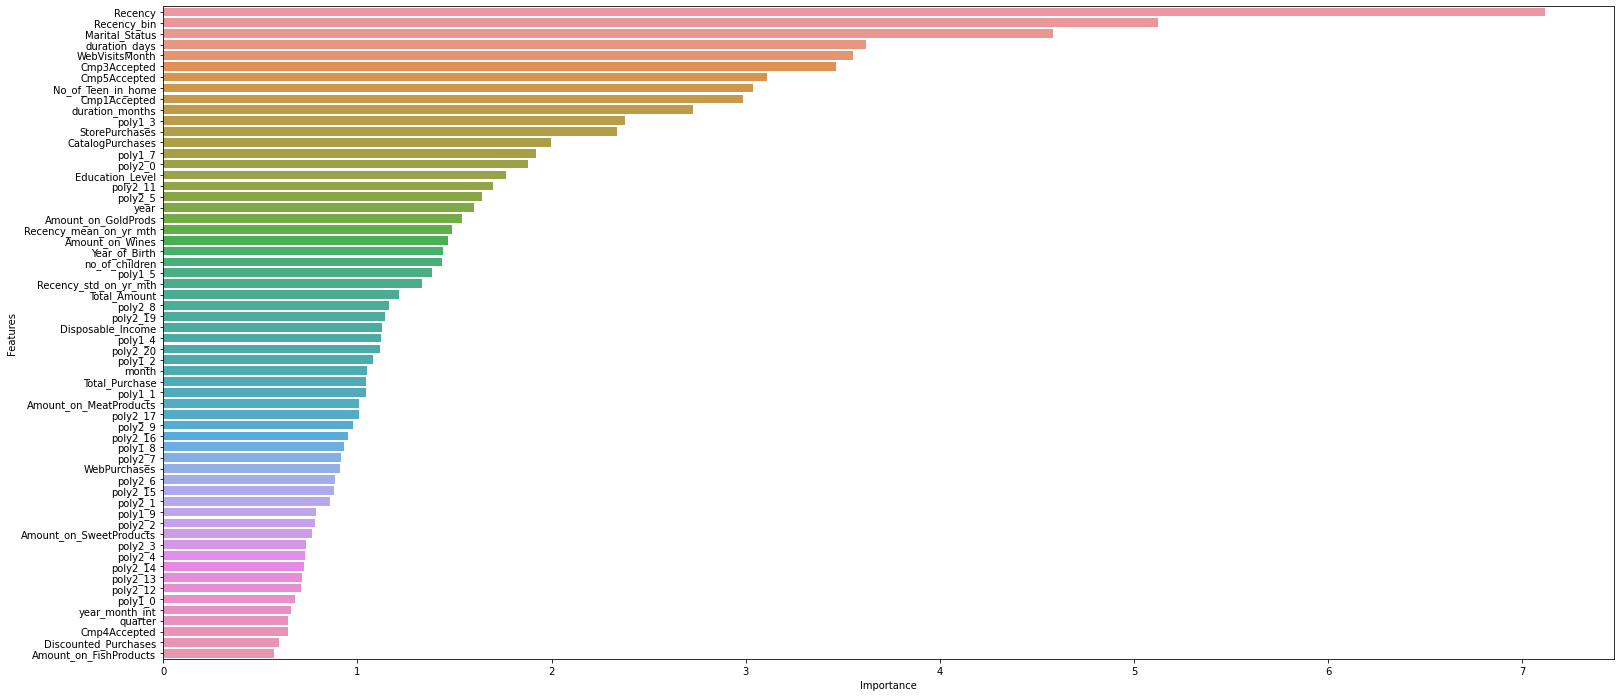

In [122]:
plt.figure(figsize = (26, 12))
sns.barplot(x = 'Importance', y = 'Features', data = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(60))
plt.show()

In [125]:
new_feat = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(50)['Features'].to_list()

In [124]:
new_feat

['Recency',
 'Recency_bin',
 'Marital_Status',
 'duration_days',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp5Accepted',
 'No_of_Teen_in_home',
 'Cmp1Accepted',
 'duration_months',
 'poly1_3',
 'StorePurchases',
 'CatalogPurchases',
 'poly1_7',
 'poly2_0',
 'Education_Level',
 'poly2_11',
 'poly2_5',
 'year',
 'Amount_on_GoldProds',
 'Recency_mean_on_yr_mth',
 'Amount_on_Wines',
 'Year_of_Birth',
 'no_of_children',
 'poly1_5',
 'Recency_std_on_yr_mth',
 'Total_Amount',
 'poly2_8',
 'poly2_19',
 'Disposable_Income',
 'poly1_4',
 'poly2_20',
 'poly1_2',
 'month',
 'Total_Purchase',
 'poly1_1',
 'Amount_on_MeatProducts',
 'poly2_17',
 'poly2_9',
 'poly2_16',
 'poly1_8',
 'poly2_7',
 'WebPurchases',
 'poly2_6',
 'poly2_15',
 'poly2_1',
 'poly1_9',
 'poly2_2',
 'Amount_on_SweetProducts',
 'poly2_3']

#### Hyperparameter Tunning

In [1]:
import optuna

ModuleNotFoundError: No module named 'optuna'

In [127]:
X = train_df[new_feat]
y = train_df[target]